In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [17]:
dt = pd.read_csv("Matches.csv")

In [19]:
dt

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,67,"May 19,2022","Wankhede Stadium, Mumbai",Banglore,Gujarat,Group,Gujarat,Bat,168,5,170,2,Banglore,Wickets,8,Virat Kohli,Virat Kohli,73,Rashid Khan,2--32
67,68,"May 20,2022","Brabourne Stadium, Mumbai",Chennai,Rajasthan,Group,Chennai,Bat,150,6,151,5,Rajasthan,Wickets,5,R Aswin,Moeen Ali,93,Prashant Solanki,2--20
68,69,"May 21,2022","Wankhede Stadium, Mumbai",Delhi,Mumbai,Group,Mumbai,Field,159,7,160,5,Mumbai,Wickets,5,Jasprit Bumrah,Ishan Kishan,48,Jasprit Bumrah,3--25
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26


In [21]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             71 non-null     int64 
 1   date                 71 non-null     object
 2   venue                71 non-null     object
 3   team1                71 non-null     object
 4   team2                71 non-null     object
 5   stage                71 non-null     object
 6   toss_winner          71 non-null     object
 7   toss_decision        71 non-null     object
 8   first_ings_score     71 non-null     int64 
 9   first_ings_wkts      71 non-null     int64 
 10  second_ings_score    71 non-null     int64 
 11  second_ings_wkts     71 non-null     int64 
 12  match_winner         71 non-null     object
 13  won_by               71 non-null     object
 14  margin               71 non-null     int64 
 15  player_of_the_match  70 non-null     object
 16  top_scorer

### Number of matches won by each team

In [60]:
winner = dt["match_winner"].value_counts()

In [62]:
winner

match_winner
Gujarat      11
Rajasthan     9
Lucknow       9
Banglore      8
Delhi         7
Punjab        7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

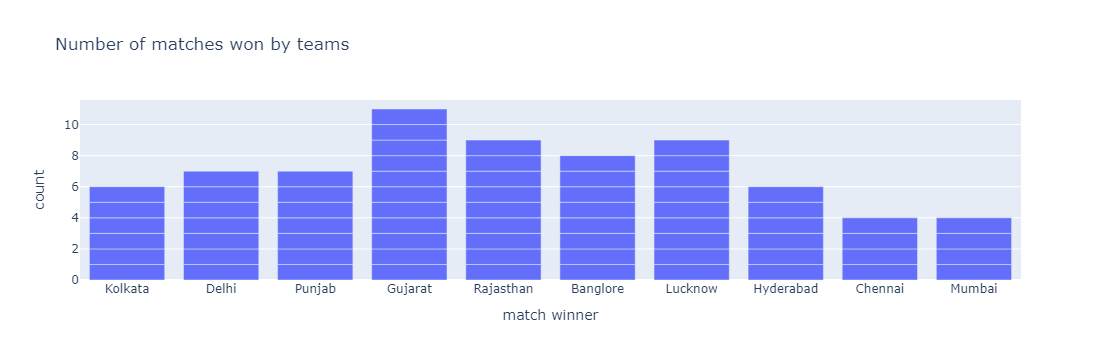

In [117]:
figure = px.bar( dt , x = dt["match_winner"], title = "Number of matches won by teams",
               )
figure.update_layout(yaxis =dict(tickvals= [0,2,4,6,8,10,12,14]), 
                    xaxis = dict(title_text = "match winner"))
figure.show()

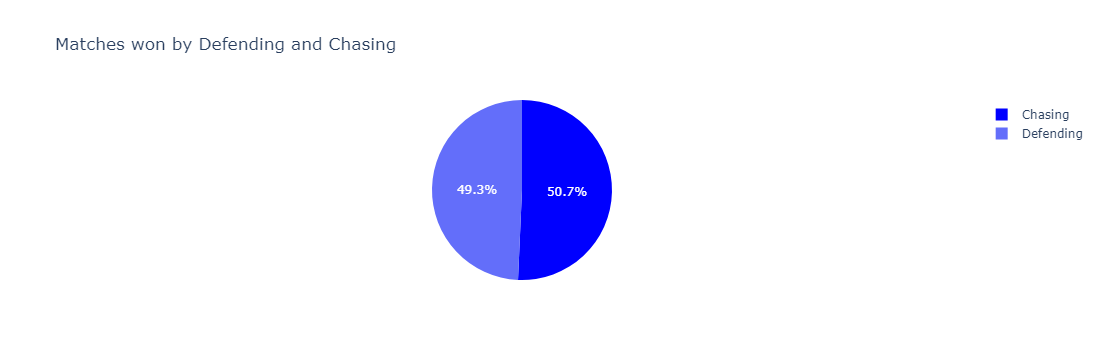

In [225]:
won = dt[ "won_by" ].map({"Wickets": 'Defending', 'Runs': 'Chasing'})
won_by = won.value_counts()
x = won_by.index
y = won_by.values
fig = go.Figure(data = [go.Pie(labels = x , values = y)])
fig.update_traces(hoverinfo = 'label+percent', marker = dict(colors = ['blue','navy_blue']))
fig.update_layout(title = 'Matches won by Defending and Chasing')
fig.show()


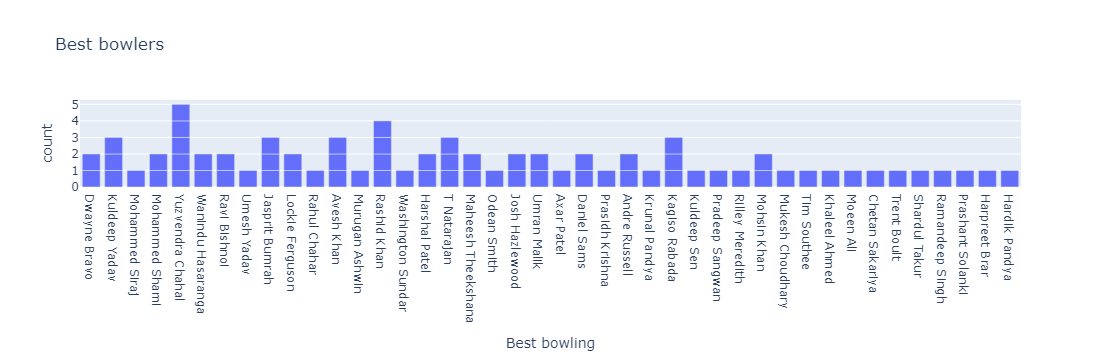

In [263]:
fig = px.bar(dt, x = dt['best_bowling'], title = 'Best bowlers', orientation = 'v')
fig.update_layout(yaxis= dict( tickvals=[0,1,2,3,4,5]), xaxis = dict(title_text = 'Best bowling'))
fig.show()

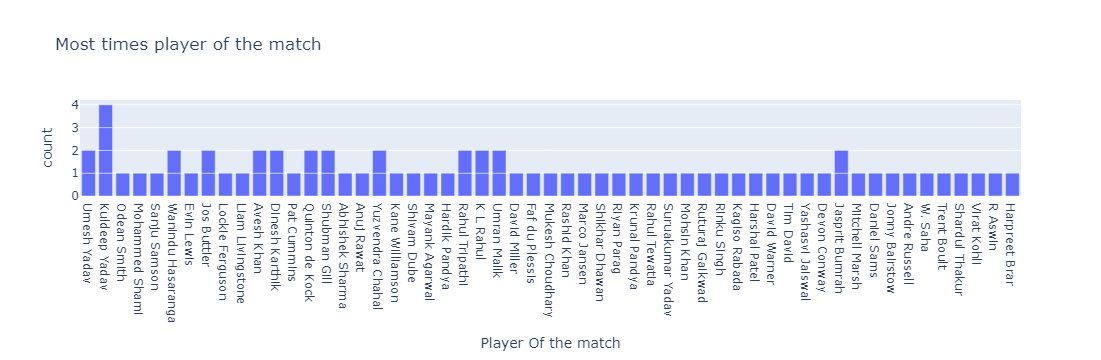

In [267]:
fig = px.bar(dt, x= dt['player_of_the_match'], title =
            'Most times player of the match')
fig.update_layout(xaxis=dict(title_text = 'Player Of the match'))
fig.show()

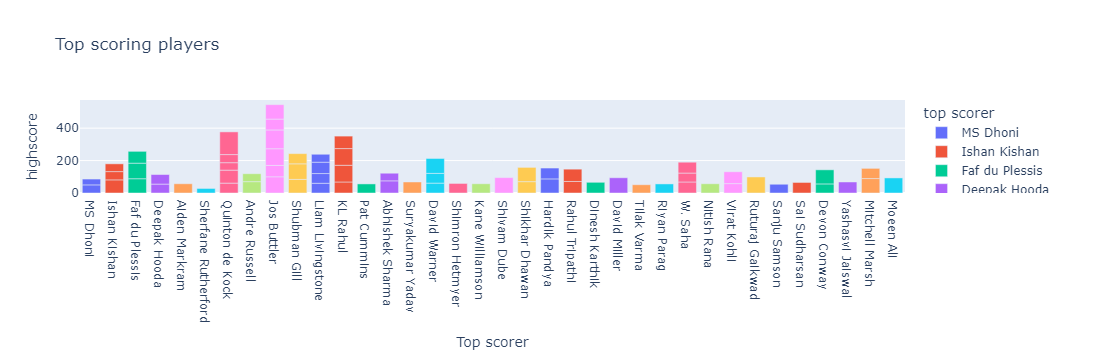

In [315]:
fig = px.bar(dt, x= dt['top_scorer'], y = dt['highscore'] ,title =
            'Top scoring players',color = 'top_scorer')
fig.update_layout(xaxis=dict(title_text = 'Top scorer'),legend_title_text='top scorer')
fig.show()